In [1]:
import os
from os.path import expanduser
import numpy as np
home_dir = expanduser("~")
result_dir = 'results/'
import datetime
import codecs, json
import math
import time
import random
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
np.random.seed(999)
random.seed(999)

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
### Parameters
name_of_benchmark = 'GPU2018-04-18'
save_figs = 0

In [3]:
### Load a json file
with open(result_dir + name_of_benchmark + '.json', 'r') as f:
    json_data = json.load(f)
f.close()

In [4]:
print(len(json_data))
print(json_data[1])

2
{'On_CPU_only': False, 'number_of_epochs': [100.0], 'training_set_size': [10000.0], 'input_features': ['Halo_mass', 'Halo_mass_peak', 'Concentration', 'Halo_spin'], 'output_features': ['Stellar_mass'], 'Parameter_order': ['batch_sizes', 'nr_of_layers', 'activation_functions', 'neurons_per_layer'], 'batch_sizes': [100.0, 500.0, 1000.0, 5000.0, 10000.0], 'nr_of_layers': [2, 4, 6], 'activation_functions': ['tanh', 'relu', 'sigmoid'], 'neurons_per_layer': [2, 6, 10]}


In [5]:
time_array = np.array(json_data[0])
json_info_dict = json_data[1]

#print(time_array)
#print(json_info_dict)

In [6]:
### Get time as function of the different inputs: sum over the rest of the inputs
n_params = len(json_info_dict['Parameter_order'])
time_dependencies = []
for i_param, param in enumerate(json_info_dict['Parameter_order']):
    
    time_dep = time_array
    
    for i in range(n_params-1, -1, -1):
        if i_param != i:
            time_dep = np.sum(time_dep, i)
            
    time_dependencies.append(time_dep)   

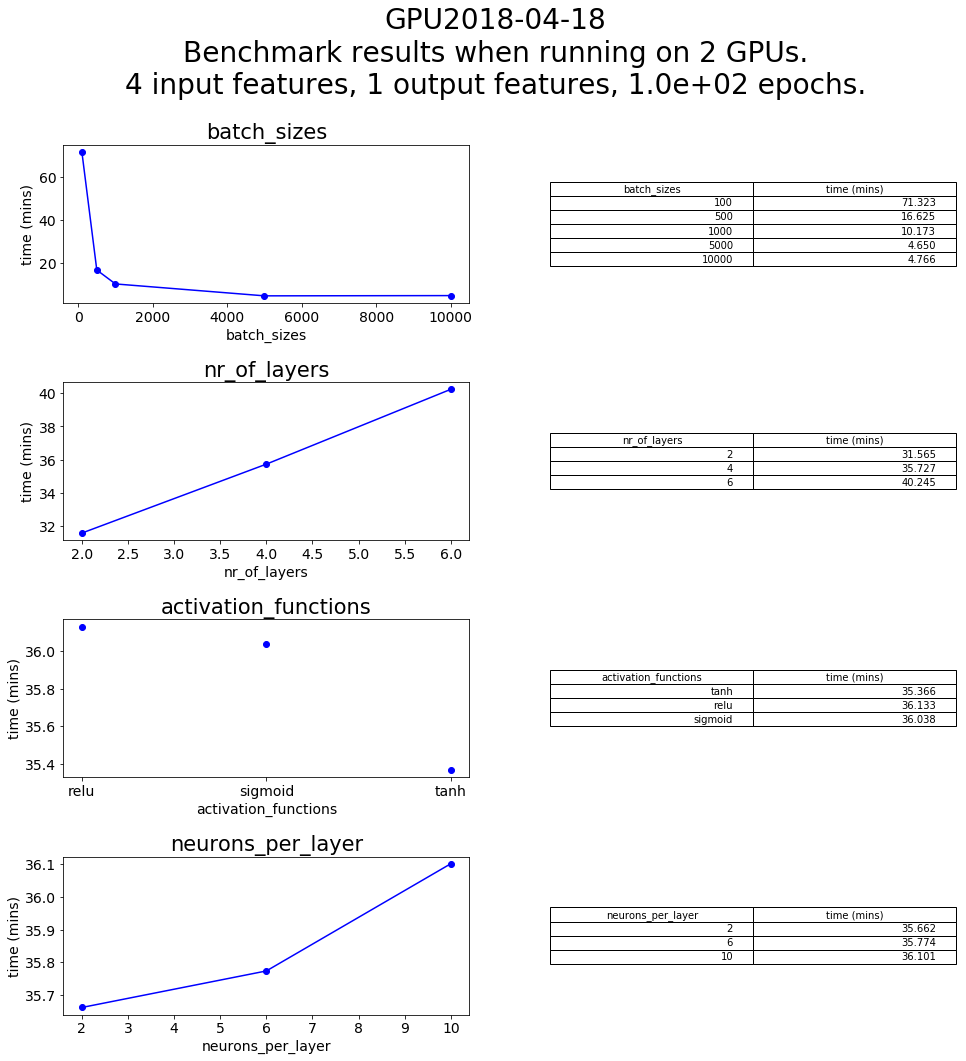

In [7]:
### Plotting params
plot_chars = {'batch_sizes': 'b-o', 'nr_of_layers': 'b-o', 'activation_functions': 'bo', 'neurons_per_layer': 'b-o', }
char_size_multiplier = 7


nRows = math.ceil(n_params)# / 2)
if n_params > 1:
    nCols = 2
else:
    nCols = 1

if json_info_dict['On_CPU_only']:
    cpu_gpu_string = 'CPU'
else:
    cpu_gpu_string = '2 GPUs'
    

fig = plt.figure(figsize=(8*nCols,4*nRows))
for i_param, param in enumerate(json_info_dict['Parameter_order']):
    ax = plt.subplot(nRows,nCols, 1 + 2*i_param)
    plt.plot(json_info_dict[param], time_dependencies[i_param], plot_chars[param])
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlabel(param, fontsize=2*char_size_multiplier)
    plt.ylabel('time (mins)', fontsize=2*char_size_multiplier)
    plt.title(param, fontsize=3*char_size_multiplier)
    ax.tick_params(axis='both', labelsize=2*char_size_multiplier)
    
    ax = plt.subplot(nRows,nCols, 2*(i_param+1))
    collabel=(param, "time (mins)")
    ax.axis('tight')
    ax.axis('off')
    
    table_vals = []
    for i in range(len(json_info_dict[param])):
        if type(json_info_dict[param][i]) is str:
            table_vals.append([json_info_dict[param][i], '%.3f' % (time_dependencies[i_param][i])])
        else:
            table_vals.append(['%d' % (json_info_dict[param][i]), '%.3f' % (time_dependencies[i_param][i])])
        
    the_table = ax.table(cellText=table_vals,colLabels=collabel,loc='center')
    the_table.scale(1, 1.4)
    
plt.suptitle(name_of_benchmark + 
    '\nBenchmark results when running on %s.\n%d input features, %d output features, %.1e epochs.' % (cpu_gpu_string, 
    len(json_data[1]['input_features']), len(json_data[1]['output_features']), json_data[1]['number_of_epochs'][0]), 
    y=1.0, fontsize=4*char_size_multiplier)
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2, hspace=0.5)
#plt.tight_layout()

plt.show()

In [8]:
if save_figs:
    fig.savefig(result_dir + name_of_benchmark + '.png', bbox_inches = 'tight')

In [9]:
hej-hej = 5
print(hej-hej)

SyntaxError: can't assign to operator (<ipython-input-9-0ad43a567440>, line 1)